In [37]:
#librairies needed
import pandas as pd
import numpy as np
import re
import seaborn as sns
import os
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
drake_data = pd.read_csv('drake_data.csv')

In [3]:
drake_data.describe()

,album,lyrics_title,lyrics_url,lyrics,track_views
count,290,290,290,288,273
unique,18,278,278,276,211
top,Unreleased Songs,The Calm Lyrics,https://genius.com/Drake-gods-plan-lyrics,[Verse 1]\nUh\nI'm just so far gone\nOctober's...,1.3M
freq,31,2,2,2,10


In [4]:
drake_data.head(20)

,album,lyrics_title,lyrics_url,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K
5,Certified Lover Boy,Laugh Now Cry Later (Ft. Lil Durk) Lyrics,https://genius.com/Drake-laugh-now-cry-later-l...,"[Intro: Drake]\nWoah, woah\nYeah\n\n[Chorus: D...",1M
6,Certified Lover Boy,Lie To Me Lyrics,https://genius.com/Drake-lie-to-me-lyrics,"[Intro: Pimp C]\nMan, get the fuck away from u...",34.5K
7,Certified Lover Boy,Intoxicated* Lyrics,https://genius.com/Drake-intoxicated-lyrics,[Chorus]\nJust hung up the phone and I\nCould ...,11.3K
8,Certified Lover Boy,Need Me (Lotta 42) Lyrics,https://genius.com/Drake-need-me-lotta-42-lyrics,[Intro]\nPreviously on Ready To Die\n\n[Chorus...,65.1K
9,Dark Lane Demo Tapes,Deep Pockets Lyrics,https://genius.com/Drake-deep-pockets-lyrics,"[Intro]\nFor my nigga Hush\nYeah, look\n\n[Ver...",202.2K


## Data Preprocessing And Feature Engineering
#### 1/ Clean ltrics title
#### 2/ Add demo, featurings, number of verses, number of chorus, number of words, averagelength sentenses, lexical diversity, positive / Negative / Neutral sentiments

In [5]:
drake_data.loc[0,'lyrics']

"[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder"

In [6]:
preprocessed = drake_data.copy()
for col in preprocessed.columns[:-1]:
    preprocessed[col] = preprocessed[col].str.lower()

In [7]:
preprocessed.head(20)

,album,lyrics_title,lyrics_url,lyrics,track_views
0,certified lover boy,certified lover boy* lyrics,https://genius.com/drake-certified-lover-boy-l...,[verse]\nput my feelings on ice\nalways been a...,8.7K
1,certified lover boy,like i’m supposed to/do things lyrics,https://genius.com/drake-like-im-supposed-to-d...,[verse]\nhands are tied\nsomeone's in my ear f...,38.8K
2,certified lover boy,not around lyrics,https://genius.com/drake-not-around-lyrics,"[intro]\nyeah, we back\nwassup ladies?\nswisha...",129.8K
3,certified lover boy,in the cut (ft. roddy ricch) lyrics,https://genius.com/drake-in-the-cut-lyrics,"[intro: drake]\nayy, yeah\npipe this shit up a...",72.1K
4,certified lover boy,zodiac sign (ft. jessie reyez) lyrics,https://genius.com/drake-zodiac-sign-lyrics,[verse 1: drake]\nyou ask how many girls i bee...,54.8K
5,certified lover boy,laugh now cry later (ft. lil durk) lyrics,https://genius.com/drake-laugh-now-cry-later-l...,"[intro: drake]\nwoah, woah\nyeah\n\n[chorus: d...",1M
6,certified lover boy,lie to me lyrics,https://genius.com/drake-lie-to-me-lyrics,"[intro: pimp c]\nman, get the fuck away from u...",34.5K
7,certified lover boy,intoxicated* lyrics,https://genius.com/drake-intoxicated-lyrics,[chorus]\njust hung up the phone and i\ncould ...,11.3K
8,certified lover boy,need me (lotta 42) lyrics,https://genius.com/drake-need-me-lotta-42-lyrics,[intro]\npreviously on ready to die\n\n[chorus...,65.1K
9,dark lane demo tapes,deep pockets lyrics,https://genius.com/drake-deep-pockets-lyrics,"[intro]\nfor my nigga hush\nyeah, look\n\n[ver...",202.2K


In [8]:
preprocessed['lyrics_title'] = preprocessed['lyrics_title'].apply(lambda x : x.replace('lyrics', ''))
preprocessed["is_demo"] = preprocessed.lyrics_title.apply(lambda x: 1 if x.find('demo') != -1 else 0)

In [9]:
preprocessed.loc[9:19,:]

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo
9,dark lane demo tapes,deep pockets,https://genius.com/drake-deep-pockets-lyrics,"[intro]\nfor my nigga hush\nyeah, look\n\n[ver...",202.2K,0
10,dark lane demo tapes,when to say when,https://genius.com/drake-when-to-say-when-lyrics,"[intro]\nyeah\nsomebody, um\nsomebody hit me t...",555K,0
11,dark lane demo tapes,chicago freestyle (ft. giveon),https://genius.com/drake-chicago-freestyle-lyrics,"[chorus: giveon]\ntwo-thirty, baby, won't you ...",1.3M,0
12,dark lane demo tapes,not you too (ft. chris brown),https://genius.com/drake-not-you-too-lyrics,[chorus: drake]\nfirst time in a long time\nhu...,295K,0
13,dark lane demo tapes,toosie slide,https://genius.com/drake-toosie-slide-lyrics,"[pre-chorus]\nblack leather glove, no sequins\...",1.3M,0
14,dark lane demo tapes,desires (ft. future),https://genius.com/drake-desires-lyrics,[intro: drake]\nd. hill (d. hill)\nayy\n\n[cho...,549K,0
15,dark lane demo tapes,time flies,https://genius.com/drake-time-flies-lyrics,"[chorus]\nyeah, i'm outside in an amg\nright o...",381.8K,0
16,dark lane demo tapes,landed,https://genius.com/drake-landed-lyrics,"[intro]\nyeah, ayy, ayy\n\n[chorus]\nif i gott...",197.4K,0
17,dark lane demo tapes,"d4l by future, drake & young thug",https://genius.com/future-drake-and-young-thug...,"[intro: young thug]\n(808 my crew)\n(ayy, sout...",255.3K,0
18,dark lane demo tapes,pain 1993 (ft. playboi carti),https://genius.com/drake-pain-1993-lyrics,"[intro: drake]\n(yo, pi'erre, yo, pi’erre)\nay...",600.3K,0


In [10]:
preprocessed.lyrics_title = preprocessed.lyrics_title.apply(lambda x: x.replace('(demo)',''))

In [11]:
preprocessed.loc[9:19,:]

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo
9,dark lane demo tapes,deep pockets,https://genius.com/drake-deep-pockets-lyrics,"[intro]\nfor my nigga hush\nyeah, look\n\n[ver...",202.2K,0
10,dark lane demo tapes,when to say when,https://genius.com/drake-when-to-say-when-lyrics,"[intro]\nyeah\nsomebody, um\nsomebody hit me t...",555K,0
11,dark lane demo tapes,chicago freestyle (ft. giveon),https://genius.com/drake-chicago-freestyle-lyrics,"[chorus: giveon]\ntwo-thirty, baby, won't you ...",1.3M,0
12,dark lane demo tapes,not you too (ft. chris brown),https://genius.com/drake-not-you-too-lyrics,[chorus: drake]\nfirst time in a long time\nhu...,295K,0
13,dark lane demo tapes,toosie slide,https://genius.com/drake-toosie-slide-lyrics,"[pre-chorus]\nblack leather glove, no sequins\...",1.3M,0
14,dark lane demo tapes,desires (ft. future),https://genius.com/drake-desires-lyrics,[intro: drake]\nd. hill (d. hill)\nayy\n\n[cho...,549K,0
15,dark lane demo tapes,time flies,https://genius.com/drake-time-flies-lyrics,"[chorus]\nyeah, i'm outside in an amg\nright o...",381.8K,0
16,dark lane demo tapes,landed,https://genius.com/drake-landed-lyrics,"[intro]\nyeah, ayy, ayy\n\n[chorus]\nif i gott...",197.4K,0
17,dark lane demo tapes,"d4l by future, drake & young thug",https://genius.com/future-drake-and-young-thug...,"[intro: young thug]\n(808 my crew)\n(ayy, sout...",255.3K,0
18,dark lane demo tapes,pain 1993 (ft. playboi carti),https://genius.com/drake-pain-1993-lyrics,"[intro: drake]\n(yo, pi'erre, yo, pi’erre)\nay...",600.3K,0


In [12]:
preprocessed.loc[9:19,:]

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo
9,dark lane demo tapes,deep pockets,https://genius.com/drake-deep-pockets-lyrics,"[intro]\nfor my nigga hush\nyeah, look\n\n[ver...",202.2K,0
10,dark lane demo tapes,when to say when,https://genius.com/drake-when-to-say-when-lyrics,"[intro]\nyeah\nsomebody, um\nsomebody hit me t...",555K,0
11,dark lane demo tapes,chicago freestyle (ft. giveon),https://genius.com/drake-chicago-freestyle-lyrics,"[chorus: giveon]\ntwo-thirty, baby, won't you ...",1.3M,0
12,dark lane demo tapes,not you too (ft. chris brown),https://genius.com/drake-not-you-too-lyrics,[chorus: drake]\nfirst time in a long time\nhu...,295K,0
13,dark lane demo tapes,toosie slide,https://genius.com/drake-toosie-slide-lyrics,"[pre-chorus]\nblack leather glove, no sequins\...",1.3M,0
14,dark lane demo tapes,desires (ft. future),https://genius.com/drake-desires-lyrics,[intro: drake]\nd. hill (d. hill)\nayy\n\n[cho...,549K,0
15,dark lane demo tapes,time flies,https://genius.com/drake-time-flies-lyrics,"[chorus]\nyeah, i'm outside in an amg\nright o...",381.8K,0
16,dark lane demo tapes,landed,https://genius.com/drake-landed-lyrics,"[intro]\nyeah, ayy, ayy\n\n[chorus]\nif i gott...",197.4K,0
17,dark lane demo tapes,"d4l by future, drake & young thug",https://genius.com/future-drake-and-young-thug...,"[intro: young thug]\n(808 my crew)\n(ayy, sout...",255.3K,0
18,dark lane demo tapes,pain 1993 (ft. playboi carti),https://genius.com/drake-pain-1993-lyrics,"[intro: drake]\n(yo, pi'erre, yo, pi’erre)\nay...",600.3K,0


In [13]:
def extract_feat(s):
    artist = s[s.find("(")+1:s.find(")")]
    if artist.find('ft.') != -1:
        return 1
    else:
        return 0
    
def remove_artist(s):
    artist = s[s.find("(")+1:s.find(")")]
    if artist.find('ft.') != -1:
        return s[:s.find("(")]
    else:
        return s

In [14]:
preprocessed['featuring'] = preprocessed.lyrics_title.apply(extract_feat)
preprocessed.lyrics_title = preprocessed.lyrics_title.apply(remove_artist)
preprocessed.lyrics_title = preprocessed.lyrics_title.apply(lambda x:re.sub(r'[^\w\s]', '', x) )

In [15]:
preprocessed.head(50)

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo,featuring
0,certified lover boy,certified lover boy,https://genius.com/drake-certified-lover-boy-l...,[verse]\nput my feelings on ice\nalways been a...,8.7K,0,0
1,certified lover boy,like im supposed todo things,https://genius.com/drake-like-im-supposed-to-d...,[verse]\nhands are tied\nsomeone's in my ear f...,38.8K,0,0
2,certified lover boy,not around,https://genius.com/drake-not-around-lyrics,"[intro]\nyeah, we back\nwassup ladies?\nswisha...",129.8K,0,0
3,certified lover boy,in the cut,https://genius.com/drake-in-the-cut-lyrics,"[intro: drake]\nayy, yeah\npipe this shit up a...",72.1K,0,1
4,certified lover boy,zodiac sign,https://genius.com/drake-zodiac-sign-lyrics,[verse 1: drake]\nyou ask how many girls i bee...,54.8K,0,1
5,certified lover boy,laugh now cry later,https://genius.com/drake-laugh-now-cry-later-l...,"[intro: drake]\nwoah, woah\nyeah\n\n[chorus: d...",1M,0,1
6,certified lover boy,lie to me,https://genius.com/drake-lie-to-me-lyrics,"[intro: pimp c]\nman, get the fuck away from u...",34.5K,0,0
7,certified lover boy,intoxicated,https://genius.com/drake-intoxicated-lyrics,[chorus]\njust hung up the phone and i\ncould ...,11.3K,0,0
8,certified lover boy,need me lotta 42,https://genius.com/drake-need-me-lotta-42-lyrics,[intro]\npreviously on ready to die\n\n[chorus...,65.1K,0,0
9,dark lane demo tapes,deep pockets,https://genius.com/drake-deep-pockets-lyrics,"[intro]\nfor my nigga hush\nyeah, look\n\n[ver...",202.2K,0,0


In [16]:
def view_preprocess(s):
    if type(s)!= float:
        if s[-1]=='K':
            return float(s.replace('K',''))*1000
        if s[-1]=='M':
            return float(s.replace('M',''))*10**6

preprocessed.track_views = preprocessed.track_views.apply(view_preprocess)
preprocessed = preprocessed.loc[preprocessed.lyrics.dropna().index,:]

In [17]:
preprocessed['number_of_verses']=0
preprocessed['number_of_chorus']=0
preprocessed.loc[preprocessed.lyrics.notna().index,'number_of_verses'] = preprocessed.lyrics[preprocessed.lyrics.notna()].apply(lambda x:len( re.findall(r'verse',x)))
preprocessed.loc[preprocessed.lyrics.notna().index,'number_of_chorus'] = preprocessed.lyrics[preprocessed.lyrics.notna()].apply(lambda x:len( re.findall(r'chorus',x)))

preprocessed.loc[preprocessed.lyrics.notna().index,'lyrics'] = preprocessed.lyrics[preprocessed.lyrics.notna()].apply(lambda x: re.sub(r'\[([^]]*)]','',x))
preprocessed.loc[preprocessed.lyrics.notna().index,'lyrics'] = preprocessed.lyrics[preprocessed.lyrics.notna()].apply(lambda x: x.replace('\n',' '))
preprocessed.loc[preprocessed.lyrics.notna().index,'lyrics'] = preprocessed.lyrics[preprocessed.lyrics.notna()].apply(lambda x:re.sub(r'[^\w\s]', '', x))

In [18]:
preprocessed.head(50)

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo,featuring,number_of_verses,number_of_chorus
0,certified lover boy,certified lover boy,https://genius.com/drake-certified-lover-boy-l...,put my feelings on ice always been a gem cert...,8700.0,0,0,1,0
1,certified lover boy,like im supposed todo things,https://genius.com/drake-like-im-supposed-to-d...,hands are tied someones in my ear from the ot...,38800.0,0,0,1,2
2,certified lover boy,not around,https://genius.com/drake-not-around-lyrics,yeah we back wassup ladies swishahouse baby w...,129800.0,0,0,2,3
3,certified lover boy,in the cut,https://genius.com/drake-in-the-cut-lyrics,ayy yeah pipe this shit up and i turn this sh...,72100.0,0,1,2,2
4,certified lover boy,zodiac sign,https://genius.com/drake-zodiac-sign-lyrics,you ask how many girls i been with in my life...,54800.0,0,1,2,0
5,certified lover boy,laugh now cry later,https://genius.com/drake-laugh-now-cry-later-l...,woah woah yeah sometimes we laugh and somet...,1000000.0,0,1,3,7
6,certified lover boy,lie to me,https://genius.com/drake-lie-to-me-lyrics,man get the fuck away from us we dont want no...,34500.0,0,0,1,2
7,certified lover boy,intoxicated,https://genius.com/drake-intoxicated-lyrics,just hung up the phone and i could already te...,11300.0,0,0,2,1
8,certified lover boy,need me lotta 42,https://genius.com/drake-need-me-lotta-42-lyrics,previously on ready to die never had a lot ...,65100.0,0,0,2,2
9,dark lane demo tapes,deep pockets,https://genius.com/drake-deep-pockets-lyrics,for my nigga hush yeah look dressed in fati...,202200.0,0,0,2,2


In [19]:
preprocessed['# Of Words']                 = preprocessed['lyrics'].apply(lambda x: len(x.split(' ')))
#preprocessed['# Of StopWords']             = preprocessed['lyrics'].apply(lambda x: len([word for word in x.split(' ') if word in list(stopwords)]))
#preprocessed['Average Word Length']        = preprocessed['lyrics'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(stopwords)])))
preprocessed['Average Sentence Length']    = preprocessed['lyrics'].apply(lambda x: np.mean(np.array([len(va) for va in x.split('.')])))

In [20]:
preprocessed.head()

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo,featuring,number_of_verses,number_of_chorus,# Of Words,Average Sentence Length
0,certified lover boy,certified lover boy,https://genius.com/drake-certified-lover-boy-l...,put my feelings on ice always been a gem cert...,8700.0,0,0,1,0,21,113.0
1,certified lover boy,like im supposed todo things,https://genius.com/drake-like-im-supposed-to-d...,hands are tied someones in my ear from the ot...,38800.0,0,0,1,2,180,825.0
2,certified lover boy,not around,https://genius.com/drake-not-around-lyrics,yeah we back wassup ladies swishahouse baby w...,129800.0,0,0,2,3,566,2691.0
3,certified lover boy,in the cut,https://genius.com/drake-in-the-cut-lyrics,ayy yeah pipe this shit up and i turn this sh...,72100.0,0,1,2,2,339,1592.0
4,certified lover boy,zodiac sign,https://genius.com/drake-zodiac-sign-lyrics,you ask how many girls i been with in my life...,54800.0,0,1,2,0,446,2206.0


In [21]:
sid = SIA()
preprocessed['sentiments']           = preprocessed['lyrics'].apply(lambda x: sid.polarity_scores(x))
preprocessed['Positive Sentiment']   = preprocessed['sentiments'].apply(lambda x: x['pos']) 
preprocessed['Neutral Sentiment']    = preprocessed['sentiments'].apply(lambda x: x['neu'])
preprocessed['Negative Sentiment']   = preprocessed['sentiments'].apply(lambda x: x['neg'])

preprocessed.drop(columns=['sentiments'],inplace=True)

In [22]:
def lexical_diversity(text):  
    return len(set(text)) / len(text)

In [23]:
preprocessed['lexical diversity']   = preprocessed['lyrics'].apply(lexical_diversity)

In [24]:
preprocessed.shape

(288, 15)

In [25]:
#Album Mean Statistics DF
album_d = preprocessed.groupby(by='album').mean()
album_d.drop(index='unreleased songs',inplace=True)
album_d['Release_Year'] = 0
album_d.loc['care package','Release_Year']                         =2019
album_d.loc['certified lover boy','Release_Year']                  =2021
album_d.loc['comeback season','Release_Year']                      =2007
album_d.loc['dark lane demo tapes','Release_Year']                 =2020
album_d.loc['drake demo disk','Release_Year']                      =2006
album_d.loc['if you’re reading this it’s too late','Release_Year'] =2015
album_d.loc['more life','Release_Year']                            =2017
album_d.loc['nothing was the same','Release_Year']                 =2013
album_d.loc['room for improvement','Release_Year']                 =2006
album_d.loc['scary hours','Release_Year']                          =2018
album_d.loc['scorpion','Release_Year']                             =2018
album_d.loc['so far gone','Release_Year']                          =2009
album_d.loc['so far gone (ep)','Release_Year']                     =2009
album_d.loc['take care','Release_Year']                            =2011
album_d.loc['thank me later','Release_Year']                       =2010
album_d.loc['the best in the world pack','Release_Year']           =2019
album_d.loc['views','Release_Year']                                =2016

preprocessed.head(3)

,album,lyrics_title,lyrics_url,lyrics,track_views,is_demo,featuring,number_of_verses,number_of_chorus,# Of Words,Average Sentence Length,Positive Sentiment,Neutral Sentiment,Negative Sentiment,lexical diversity
0,certified lover boy,certified lover boy,https://genius.com/drake-certified-lover-boy-l...,put my feelings on ice always been a gem cert...,8700.0,0,0,1,0,21,113.0,0.158,0.708,0.133,0.194690
1,certified lover boy,like im supposed todo things,https://genius.com/drake-like-im-supposed-to-d...,hands are tied someones in my ear from the ot...,38800.0,0,0,1,2,180,825.0,0.143,0.790,0.067,0.027879
2,certified lover boy,not around,https://genius.com/drake-not-around-lyrics,yeah we back wassup ladies swishahouse baby w...,129800.0,0,0,2,3,566,2691.0,0.069,0.751,0.180,0.011148


In [50]:
album_d.head(10)

,track_views,is_demo,featuring,number_of_verses,number_of_chorus,# Of Words,Average Sentence Length,Positive Sentiment,Neutral Sentiment,Negative Sentiment,lexical diversity,Release_Year
album,,,,,,,,,,,,
room for improvement,2.386842e+04,0.0,0.260870,1.913043,0.347826,536.304348,2560.608696,0.123652,0.794870,0.081478,0.018596,2006
drake demo disk,3.915000e+04,0.0,0.000000,3.000000,0.000000,827.500000,3880.000000,0.080500,0.826000,0.093500,0.007071,2006
comeback season,3.941739e+04,0.0,0.500000,2.125000,0.708333,566.666667,2692.375000,0.136333,0.751458,0.112292,0.016537,2007
so far gone (ep),4.347143e+05,0.0,0.428571,3.285714,3.142857,724.428571,3371.142857,0.163429,0.733571,0.103000,0.008626,2009
so far gone,2.696000e+05,0.0,0.500000,2.555556,2.277778,511.111111,2385.500000,0.147611,0.764056,0.088278,0.030799,2009
thank me later,4.501067e+05,0.0,0.466667,2.466667,2.800000,617.533333,2941.933333,0.162933,0.736400,0.100600,0.011568,2010
take care,1.511382e+06,0.0,0.454545,2.318182,2.181818,585.045455,2758.681818,0.142773,0.719545,0.137818,0.010337,2011
nothing was the same,2.486806e+06,0.0,0.437500,2.437500,2.500000,631.812500,3037.562500,0.114062,0.760125,0.125563,0.010067,2013
if you’re reading this it’s too late,1.479216e+06,0.0,0.210526,2.210526,2.421053,538.368421,2503.736842,0.120632,0.761263,0.118105,0.012202,2015


In [27]:
album_year = pd.DataFrame(album_d.Release_Year).reset_index()

In [39]:
preprocessed = album_year.merge(preprocessed, on='album', how='right')

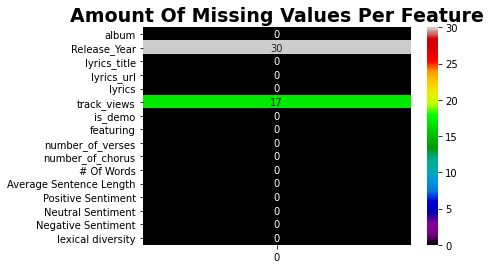

In [40]:
plt.title('Amount Of Missing Values Per Feature',fontsize=19,fontweight='bold')
sns.heatmap(preprocessed.isna().sum().to_frame(),annot=True,cmap='nipy_spectral')
plt.show()

In [41]:
#EDA

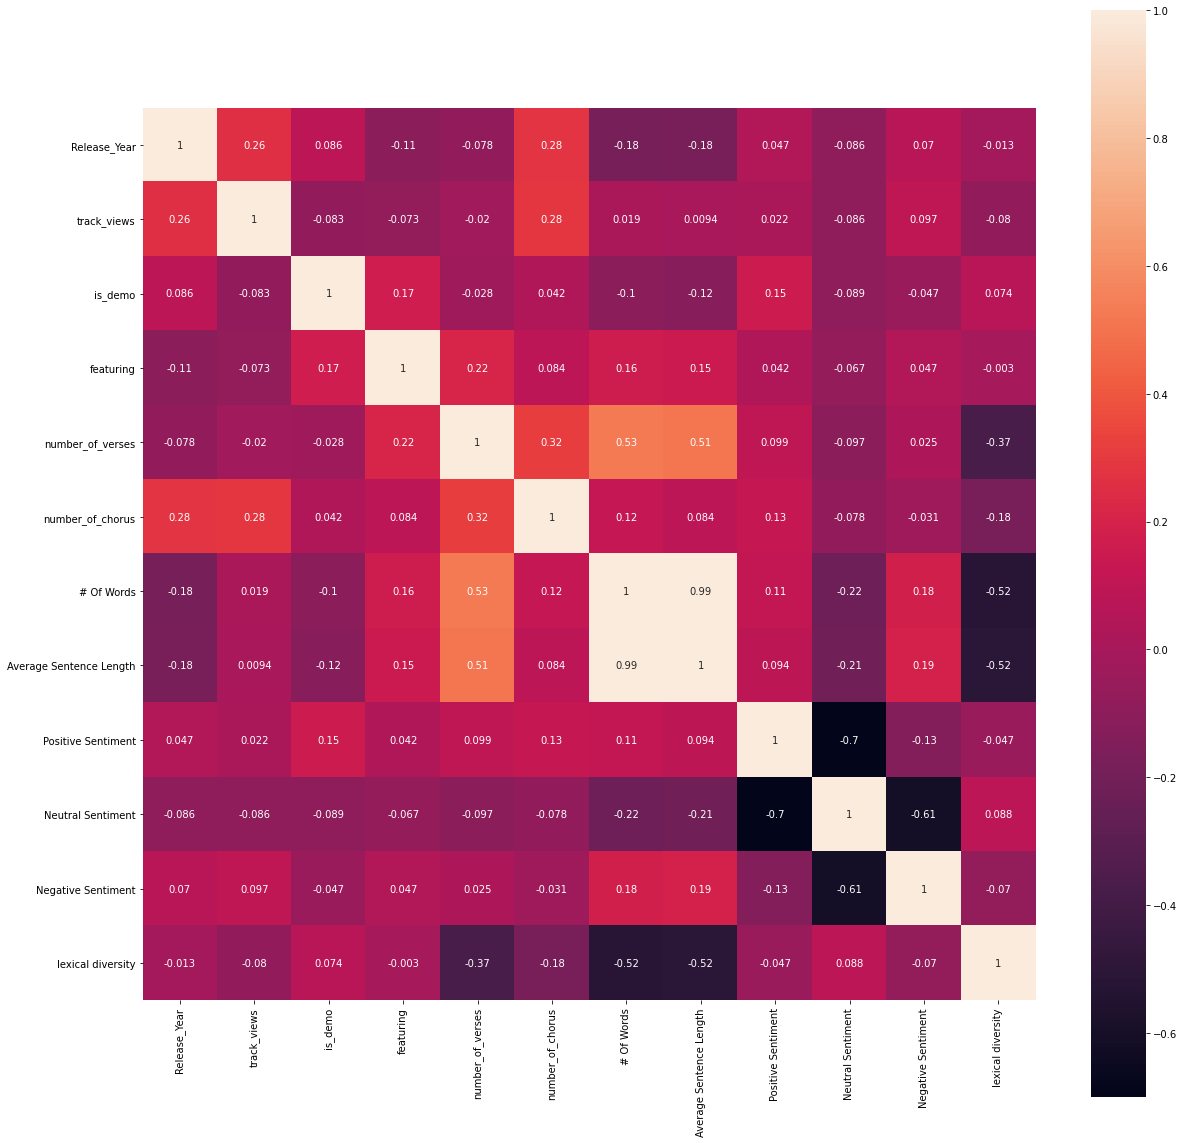

In [42]:
#Correlation between different numeric features
plt.figure(figsize=(20, 20))
p = sns.heatmap(preprocessed.corr(), annot=True, square=True)

In [45]:
preprocessed.to_csv('output-drake-data.csv')

In [48]:
album_d.to_csv('output-drake-album-data.csv')

In [51]:
preprocessed.describe()

,Release_Year,track_views,is_demo,featuring,number_of_verses,number_of_chorus,# Of Words,Average Sentence Length,Positive Sentiment,Neutral Sentiment,Negative Sentiment,lexical diversity
count,258.000000,2.710000e+02,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2013.391473,9.281705e+05,0.041667,0.368056,2.222222,2.055556,521.965278,2465.847222,0.141944,0.752122,0.105948,0.017524
std,4.798452,1.269408e+06,0.200174,0.483116,1.018604,1.805056,212.751983,1025.890780,0.061822,0.077519,0.055779,0.030332
min,2006.000000,5.900000e+03,0.000000,0.000000,0.000000,0.000000,15.000000,50.000000,0.015000,0.468000,0.000000,0.005302
25%,2009.000000,8.490000e+04,0.000000,0.000000,2.000000,0.000000,384.500000,1771.250000,0.095000,0.704500,0.071000,0.009014
50%,2015.000000,5.465000e+05,0.000000,0.000000,2.000000,2.000000,529.500000,2483.500000,0.132500,0.752000,0.100000,0.011153
75%,2018.000000,1.300000e+06,0.000000,1.000000,3.000000,3.000000,650.500000,3101.500000,0.178250,0.805000,0.133000,0.014706
max,2021.000000,8.500000e+06,1.000000,1.000000,7.000000,10.000000,1084.000000,5398.000000,0.417000,0.944000,0.361000,0.340000
